<a href="https://colab.research.google.com/github/maciekpojedynski/housing-boston-prediction/blob/main/housing_boston_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
housing = pd.read_csv('/content/boston.csv')

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [4]:
#Przygotowanie nowych nazw kolumn
column_mapping = {
    'CRIM': 'crime_rate',
    'ZN': 'residential_zone_proportion',
    'INDUS': 'non-retailand_business_acres',
    'CHAS': 'river_dummy',
    'NOX': 'nitric_oxide_concentration',
    'RM': 'average_number_of_rooms_per_dwelling',
    'DIS': 'weighted_distances_to_employment_centers',
    'RAD': 'index_of_accessibility_to_radial_highways',
    'PTRATIO': 'pupil_teacher_ratio',
    'B': 'black_ppl_per',
    'LSTAT': 'lower_population',
    'MEDV': 'median_house_value'
}

In [5]:
#Funkcja zmiany nazw kolumn
def renaming_column(df, mapping):
  return df.rename(columns = mapping)

In [6]:
housing = renaming_column(housing, column_mapping)

In [7]:
print(housing.head())

   crime_rate  residential_zone_proportion  non-retailand_business_acres  \
0     0.00632                         18.0                          2.31   
1     0.02731                          0.0                          7.07   
2     0.02729                          0.0                          7.07   
3     0.03237                          0.0                          2.18   
4     0.06905                          0.0                          2.18   

   river_dummy  nitric_oxide_concentration  \
0            0                       0.538   
1            0                       0.469   
2            0                       0.469   
3            0                       0.458   
4            0                       0.458   

   average_number_of_rooms_per_dwelling   AGE  \
0                                 6.575  65.2   
1                                 6.421  78.9   
2                                 7.185  61.1   
3                                 6.998  45.8   
4                    

In [8]:
print(housing.describe())

       crime_rate  residential_zone_proportion  non-retailand_business_acres  \
count  506.000000                   506.000000                    506.000000   
mean     3.613524                    11.363636                     11.136779   
std      8.601545                    23.322453                      6.860353   
min      0.006320                     0.000000                      0.460000   
25%      0.082045                     0.000000                      5.190000   
50%      0.256510                     0.000000                      9.690000   
75%      3.677083                    12.500000                     18.100000   
max     88.976200                   100.000000                     27.740000   

       river_dummy  nitric_oxide_concentration  \
count   506.000000                  506.000000   
mean      0.069170                    0.554695   
std       0.253994                    0.115878   
min       0.000000                    0.385000   
25%       0.000000           

In [9]:
print(housing.isnull().sum())

crime_rate                                   0
residential_zone_proportion                  0
non-retailand_business_acres                 0
river_dummy                                  0
nitric_oxide_concentration                   0
average_number_of_rooms_per_dwelling         0
AGE                                          0
weighted_distances_to_employment_centers     0
index_of_accessibility_to_radial_highways    0
TAX                                          0
pupil_teacher_ratio                          0
black_ppl_per                                0
lower_population                             0
median_house_value                           0
dtype: int64


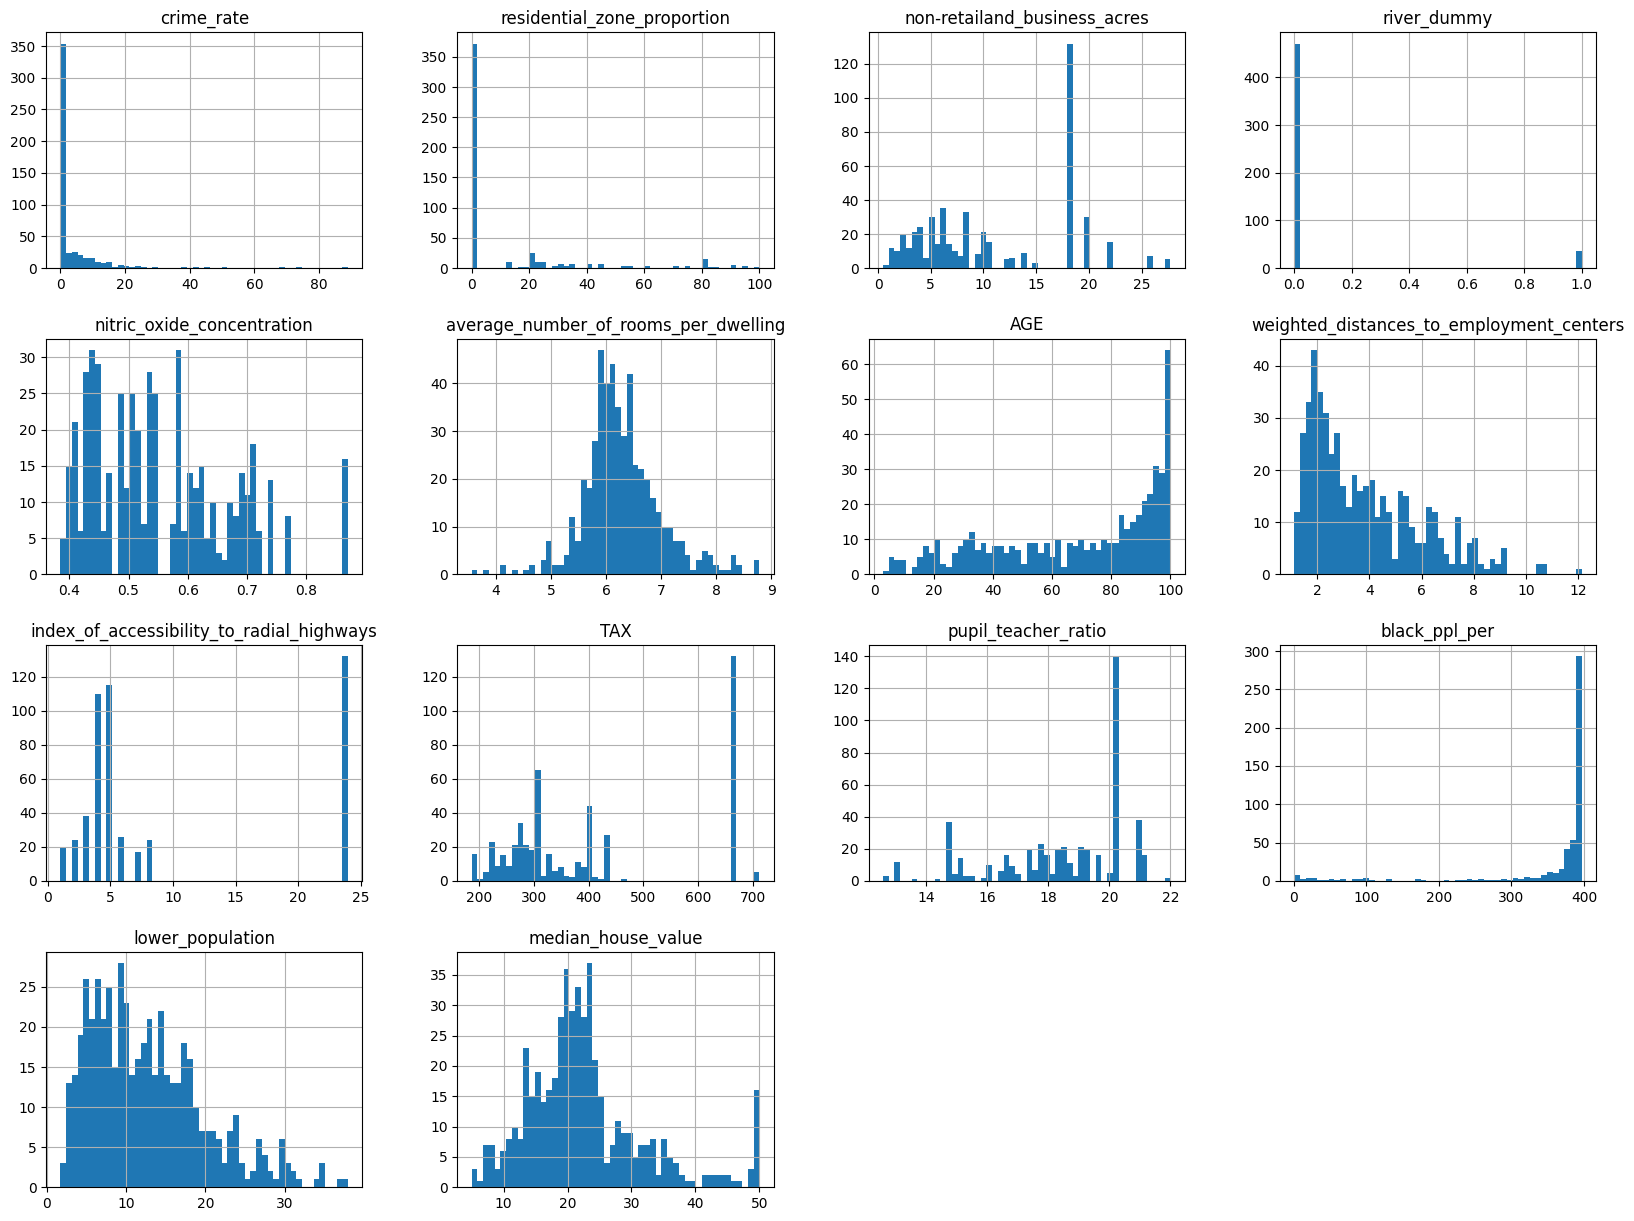

In [10]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [11]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending = False)


,median_house_value
median_house_value,1.000000
average_number_of_rooms_per_dwelling,0.695360
residential_zone_proportion,0.360445
black_ppl_per,0.333461
weighted_distances_to_employment_centers,0.249929
river_dummy,0.175260
AGE,-0.376955
index_of_accessibility_to_radial_highways,-0.381626
crime_rate,-0.388305
nitric_oxide_concentration,-0.427321


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='average_number_of_rooms_per_dwelling', ylabel='median_house_value'>,
        <Axes: xlabel='lower_population', ylabel='median_house_value'>,
        <Axes: xlabel='pupil_teacher_ratio', ylabel='median_house_value'>,
        <Axes: xlabel='non-retailand_business_acres', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='average_number_of_rooms_per_dwelling', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='lower_population', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='pupil_teacher_ratio', ylabel='average_number_of_rooms_per_dwelling'>,
        <Axes: xlabel='non-retailand_business_acres', ylabel='average_number_of_rooms_per_dwelling'>],
       [<Axes: xlabel='median_house_value', ylabel='lower_population'>,
        <Axes: xlabel='average_number_of_r

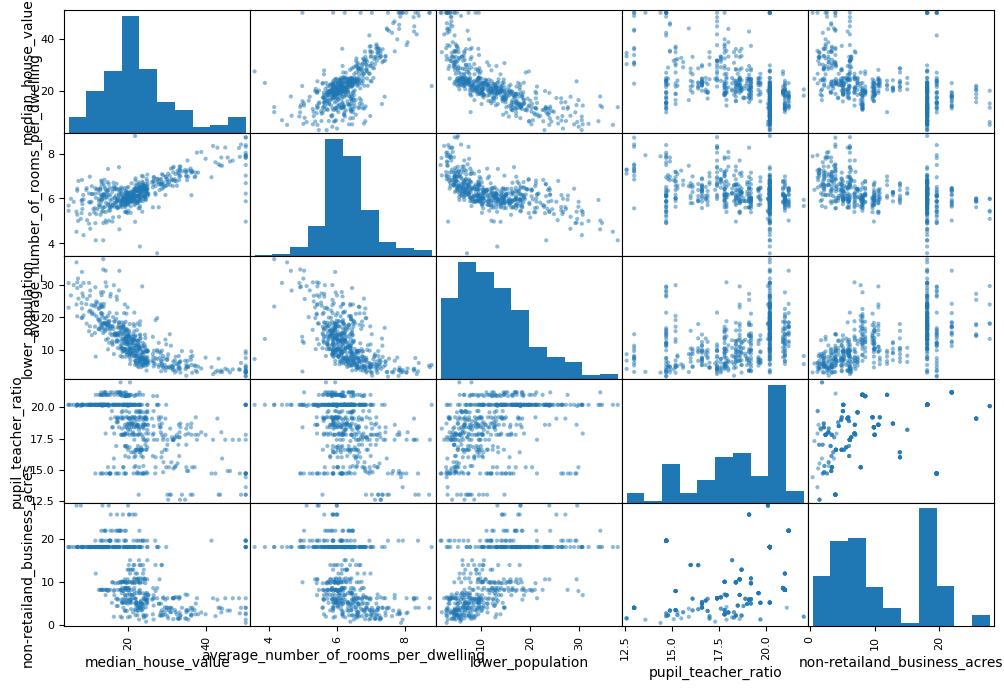

In [12]:
attributes = ['median_house_value','average_number_of_rooms_per_dwelling','lower_population','pupil_teacher_ratio', 'non-retailand_business_acres']

pd.plotting.scatter_matrix(housing[attributes], figsize = (12, 8))

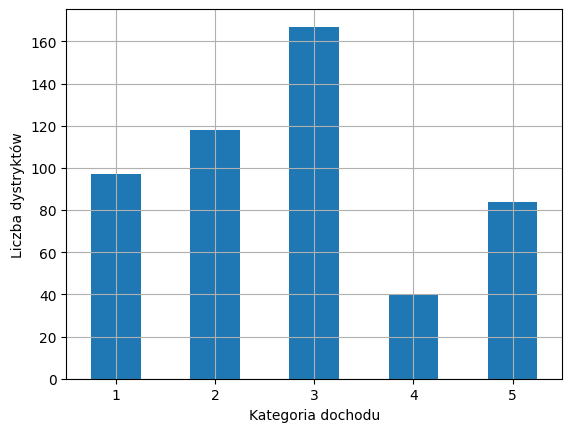

In [13]:
#Tworzenie zmiennej do stratyfikacji

housing['median_cat'] = pd.cut(housing['median_house_value'],
                               bins = [0, 15, 20, 25, 30, np.inf],
                               labels = [1, 2, 3, 4,5]
)

housing['median_cat'].value_counts().sort_index().plot.bar(rot = 0, grid = True)
plt.xlabel('Kategoria dochodu')
plt.ylabel('Liczba dystryktów')
plt.show()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing['median_cat']):
  strat_train_set_n = housing.iloc[train_index]
  strat_test_set_n = housing.iloc[test_index]
  strat_splits.append((strat_train_set_n, strat_test_set_n))

#Bierzemy tylko 1 podzial
strat_train_set, strat_test_set = strat_splits[0]



In [15]:
#usuwanie pomocniczej kolumny
housing.drop('median_cat', axis = 1, inplace=True)

In [16]:
housing = strat_train_set.copy()

<Axes: xlabel='median_house_value', ylabel='average_number_of_rooms_per_dwelling'>

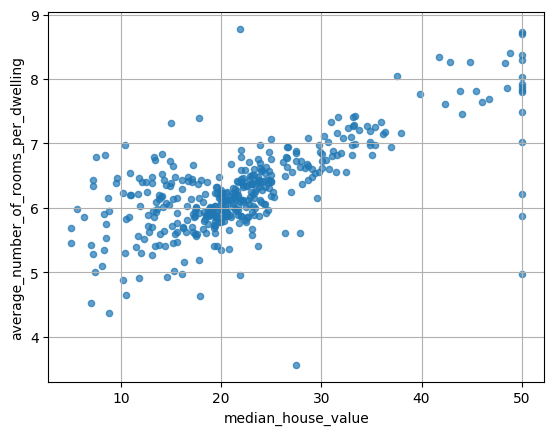

In [17]:
housing.plot(kind = 'scatter', x = 'median_house_value', y = 'average_number_of_rooms_per_dwelling', alpha = 0.7, grid = True)

<Axes: xlabel='median_house_value', ylabel='lower_population'>

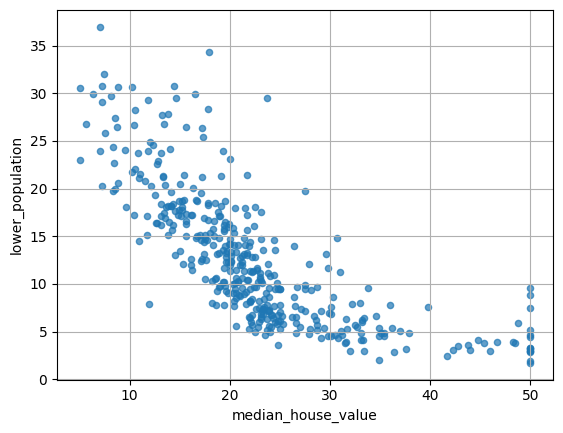

In [18]:
housing.plot(kind = 'scatter', x = 'median_house_value', y = 'lower_population', alpha = 0.7, grid = True)

In [19]:

#feature scaling
housing['room_to_poverty_ratio'] = housing['average_number_of_rooms_per_dwelling'] / housing['lower_population']
housing['distance_to_crime_ratio'] = housing['weighted_distances_to_employment_centers'] / housing['crime_rate']
housing['pupil_teacher_ratio_to_room_ratio'] = housing['pupil_teacher_ratio'] / housing['average_number_of_rooms_per_dwelling']
print(housing)

     crime_rate  residential_zone_proportion  non-retailand_business_acres  \
8       0.21124                         12.5                          7.87   
95      0.12204                          0.0                          2.89   
491     0.10574                          0.0                         27.74   
424     8.79212                          0.0                         18.10   
488     0.15086                          0.0                         27.74   
..          ...                          ...                           ...   
214     0.28955                          0.0                         10.59   
196     0.04011                         80.0                          1.52   
111     0.10084                          0.0                         10.01   
49      0.21977                          0.0                          6.91   
439     9.39063                          0.0                         18.10   

     river_dummy  nitric_oxide_concentration  \
8              

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)


,median_house_value
median_house_value,1.000000
median_cat,0.915989
room_to_poverty_ratio,0.813723
average_number_of_rooms_per_dwelling,0.698954
residential_zone_proportion,0.368301
black_ppl_per,0.333928
distance_to_crime_ratio,0.280625
weighted_distances_to_employment_centers,0.264643
river_dummy,0.171500
index_of_accessibility_to_radial_highways,-0.375739


In [21]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy()

housing['room_to_poverty_ratio'] = housing['average_number_of_rooms_per_dwelling'] / housing['lower_population']
housing['distance_to_crime_ratio'] = housing['weighted_distances_to_employment_centers'] / housing['crime_rate']
housing['pupil_teacher_ratio_to_room_ratio'] = housing['pupil_teacher_ratio'] / housing['average_number_of_rooms_per_dwelling']


In [22]:
print(housing.isnull().sum())

print(housing.columns.tolist())
print(strat_train_set.columns)
print(housing.columns)

crime_rate                                   0
residential_zone_proportion                  0
non-retailand_business_acres                 0
river_dummy                                  0
nitric_oxide_concentration                   0
average_number_of_rooms_per_dwelling         0
AGE                                          0
weighted_distances_to_employment_centers     0
index_of_accessibility_to_radial_highways    0
TAX                                          0
pupil_teacher_ratio                          0
black_ppl_per                                0
lower_population                             0
median_cat                                   0
room_to_poverty_ratio                        0
distance_to_crime_ratio                      0
pupil_teacher_ratio_to_room_ratio            0
dtype: int64
['crime_rate', 'residential_zone_proportion', 'non-retailand_business_acres', 'river_dummy', 'nitric_oxide_concentration', 'average_number_of_rooms_per_dwelling', 'AGE', 'weighted_distance

In [23]:
#feature scaling
housing['weighted_distances_to_employment_centers'] = np.log(housing['weighted_distances_to_employment_centers'])
housing['lower_population'] = np.log(housing['lower_population'])
housing['room_to_poverty_ratio'] = np.log(housing['room_to_poverty_ratio'])
housing['distance_to_crime_ratio'] = np.log(housing['distance_to_crime_ratio']+ 1e-5)

'''from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, inverse_func = np.exp)
log_pop = log_transformer.transform(housing[['weighted_distances_to_employment_centers']])'''

In [24]:
#Znalezenie brakujacych wartosci oraz inf
for col in ['weighted_distances_to_employment_centers', 'lower_population', 'room_to_poverty_ratio', 'distance_to_crime_ratio']:
    print(f"{col} - NaN count:", housing[col].isna().sum())
    print(f"{col} - Inf count:", np.isinf(housing[col]).sum())

weighted_distances_to_employment_centers - NaN count: 0
weighted_distances_to_employment_centers - Inf count: 0
lower_population - NaN count: 0
lower_population - Inf count: 0
room_to_poverty_ratio - NaN count: 0
room_to_poverty_ratio - Inf count: 0
distance_to_crime_ratio - NaN count: 0
distance_to_crime_ratio - Inf count: 0


In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')
cols_to_impute = ['weighted_distances_to_employment_centers', 'lower_population', 'room_to_poverty_ratio', 'distance_to_crime_ratio']
housing_imputed = imputer.fit_transform(housing[cols_to_impute])
housing_imputed_df = pd.DataFrame(housing_imputed, columns = cols_to_impute, index = housing.index)
housing[cols_to_impute] = housing_imputed_df



In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

housing_array = scaler.fit_transform(housing)
housing_scaled = pd.DataFrame(housing_array, columns = housing.columns)

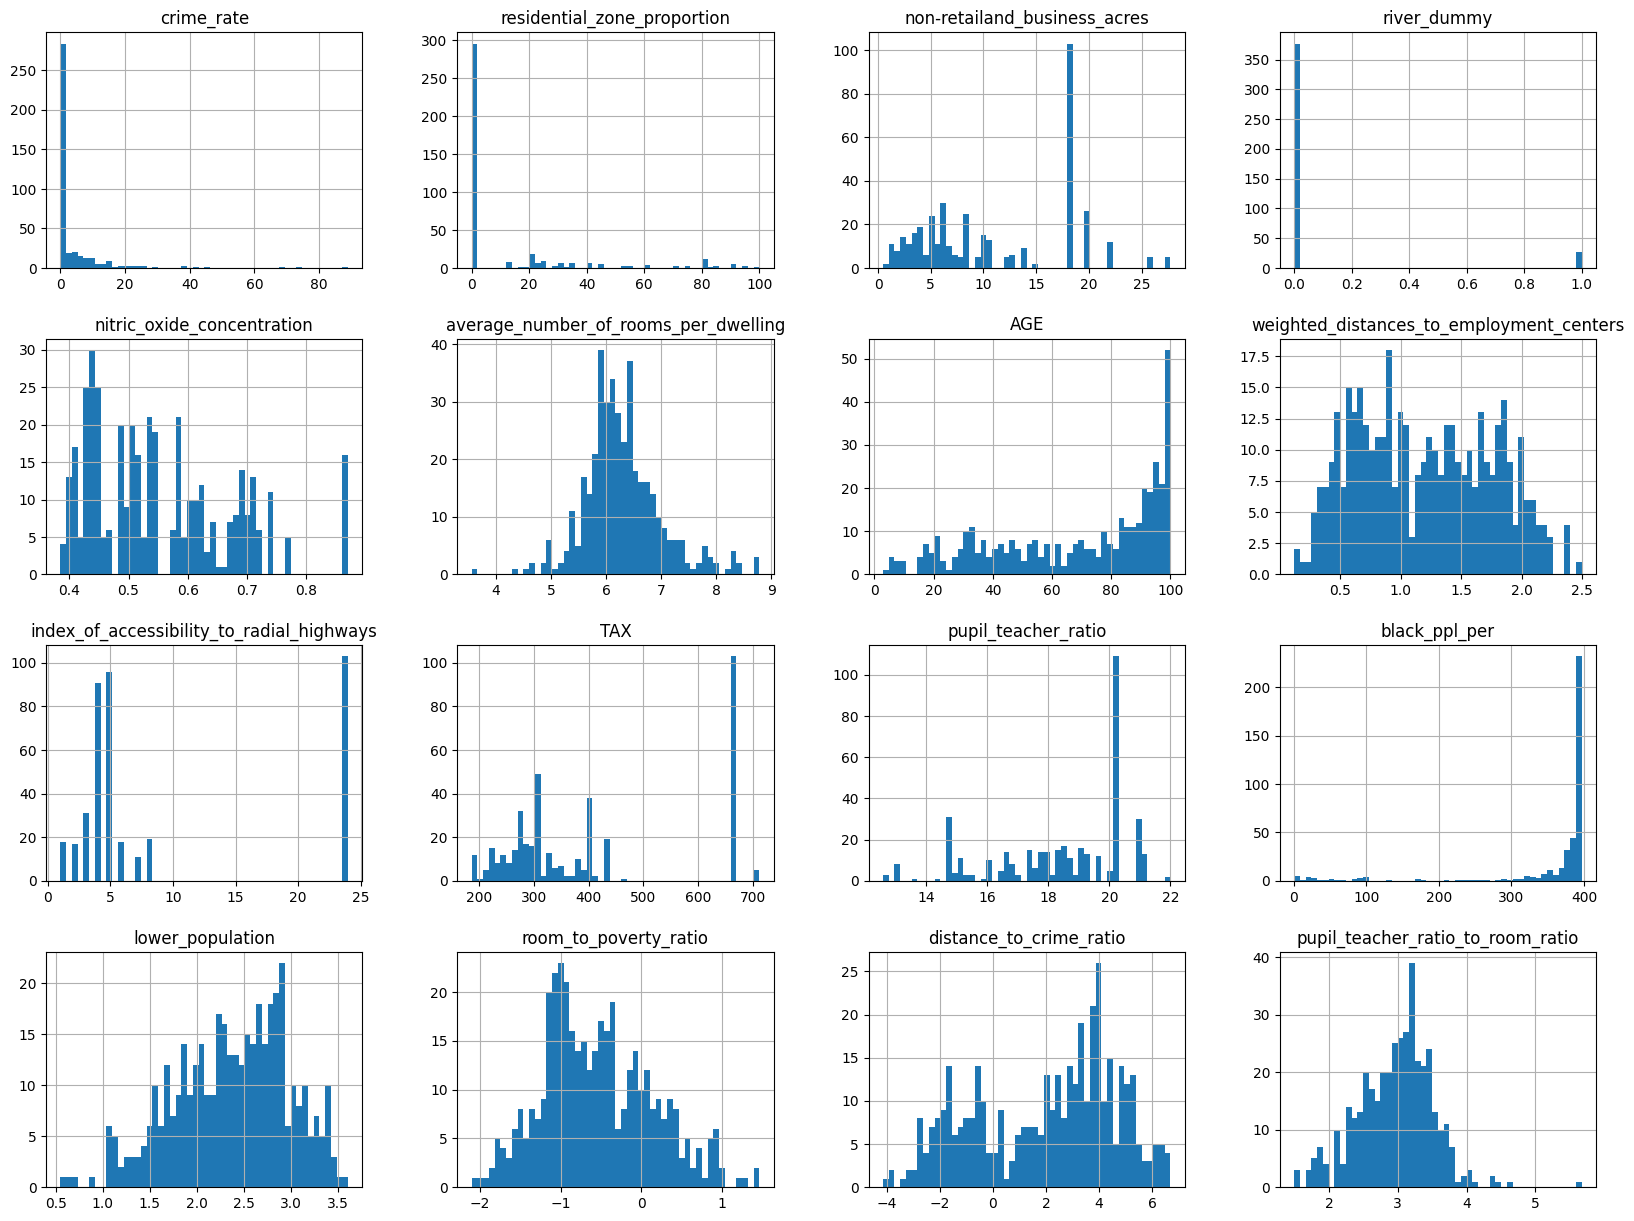

In [27]:
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [28]:
corrs = housing.apply(lambda col: col.corr(housing_labels))
print(corrs.sort_values(ascending=False))

median_cat                                   0.915989
room_to_poverty_ratio                        0.835258
average_number_of_rooms_per_dwelling         0.698954
distance_to_crime_ratio                      0.450553
residential_zone_proportion                  0.368301
black_ppl_per                                0.333928
weighted_distances_to_employment_centers     0.308542
river_dummy                                  0.171500
index_of_accessibility_to_radial_highways   -0.375739
crime_rate                                  -0.391977
AGE                                         -0.394896
nitric_oxide_concentration                  -0.436271
TAX                                         -0.469821
pupil_teacher_ratio                         -0.495863
non-retailand_business_acres                -0.497123
pupil_teacher_ratio_to_room_ratio           -0.666849
lower_population                            -0.819067
dtype: float64


In [35]:
from sklearn.pipeline import Pipeline, make_pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy = 'median')),
    ('standardize', StandardScaler()),
])

#Opcja 2

num_pipeline = make_pipeline(SimpleImputer(strategy = 'median'), StandardScaler())
housing_num_prepared = num_pipeline.fit_transform(housing)
housing_num_prepared[:2].round(2)

array([[-0.39,  0.03, -0.48, -0.27, -0.25, -0.95,  1.12,  1.11, -0.51,
        -0.57, -1.47,  0.33,  1.7 , -0.61, -1.67,  0.51, -0.5 ],
       [-0.4 , -0.49, -1.2 , -0.27, -0.91,  0.47, -0.38,  0.1 , -0.86,
        -0.78, -0.19,  0.02, -0.79,  0.93,  0.79,  0.51, -0.47]])

In [40]:
from math import remainder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

def column_ratio(X):
  return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
  return['ratio']

def safe_log_transform(X):
  return np.log(X+1e-5)

def ratio_pipeline():
  return make_pipeline(
      SimpleImputer(strategy = 'median'),
      FunctionTransformer(column_ratio, feature_names_out = ratio_name),
      StandardScaler()
  )

log_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    FunctionTransformer(safe_log_transform, feature_names_out = 'one-to-one', validate = False),
    StandardScaler()
)
default_num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                                     StandardScaler())

preprocessing = ColumnTransformer([
    ('room_to_poverty_ratio', ratio_pipeline(), ['average_number_of_rooms_per_dwelling','lower_population']),
     ('distance_to_crime_ratio', ratio_pipeline(), ['weighted_distances_to_employment_centers','crime_rate']),
     ('pupil_teacher_ratio_to_room_ratio', ratio_pipeline(), ['pupil_teacher_ratio','average_number_of_rooms_per_dwelling']),
     ('log',log_pipeline, ['weighted_distances_to_employment_centers','lower_population','room_to_poverty_ratio','distance_to_crime_ratio'])

],
remainder = default_num_pipeline)

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('room_to_poverty_ratio',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function rati...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function safe_log_transform at 0x7f482c7a8cc0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['weighted_distances_to_employment_centers',
                                                   'lower_population',
                                                   'room_to_poverty_ratio',
                                                   'distance_to_crime_ratio'])])),
                ('linearregression', LinearRegression())])

In [44]:
housing_prediciton = lin_reg.predict(housing)
housing_prediciton[:5].round(-2)



array([0., 0., 0., 0., 0.])